In [10]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18, 8)
import matplotlib.pyplot as p
import seaborn as sns
sns.set(font_scale=1.7)

In [2]:
!ls

__pycache__		     results_UI0.dat
current_U_curves	     results_excweight.dat
detection_error_minimize.py  results_inhweight.dat
deterror_vs_UI0		     results_stptime.dat
deterror_vs_excweight	     results_weights.dat
deterror_vs_inhweight	     ring.py
deterror_vs_stptime	     simulations.py
deterror_vs_weights	     test.py
example.py		     v1_activity.ipynb
example_activity_trace.png   v1_detection_error.ipynb
example_v1_simulation.ipynb  v1_parameters.py
fcn_result_benchmark	     v1_visualize.py


In [3]:
from ring import RingNetwork

If we do calculations "out-of-the-box", model parameters are taken from the input file v1_parameters.py, we only have to specify the baseline neurotransmitter release probability level $U$:

In [4]:
release_probability = 0.2
ring = RingNetwork(U=release_probability)

In [5]:
ring.integrate(simulation_time=5.0)

100%|██████████| 2499/2499 [00:04<00:00, 538.31it/s]


Let's plot the network's firing rate vs. time with a heatmap:

In [11]:
sns.heatmap(ring.m_series.T, 
            cmap='Blues',
            xticklabels=50,
            yticklabels=30)

p.title('V1 ring network firing rate vs. time')
p.ylabel('Subpopulation #')
p.xlabel('Time, a.u.');

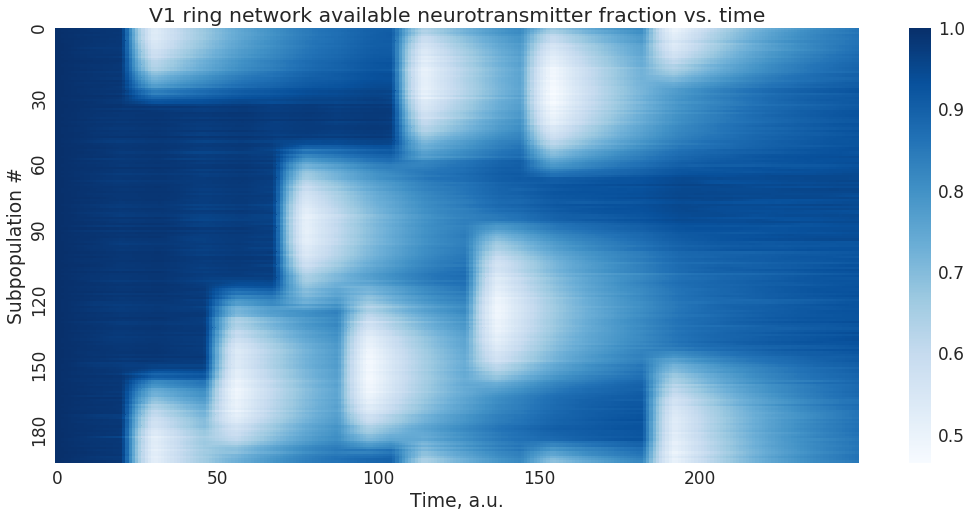

In [12]:
sns.heatmap(ring.x_series.T, 
            cmap='Blues',
            xticklabels=50,
            yticklabels=30)

p.title('V1 ring network available neurotransmitter fraction vs. time')
p.ylabel('Subpopulation #')
p.xlabel('Time, a.u.');

In [13]:
# let's look at default network parameters:
ring.N, ring.I0, ring.p.C

(200, -0.485, 10.0)

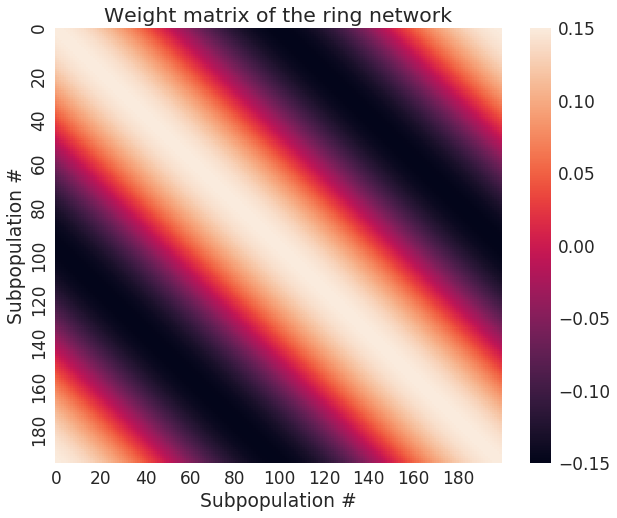

In [14]:
mpl.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(ring.W,
            xticklabels=20,
            yticklabels=20)
p.ylabel('Subpopulation #')
p.xlabel('Subpopulation #')
p.title('Weight matrix of the ring network');

Let's overload model's parameters with our custom parameter dictionary:

In [15]:
model_parameters = {
    'simulation_time': 10.0,    # total simulation time, sec
    'U': 0.3,           # baseline neurotransmitter release probability, a.u.
    'D': 0.5,           # internal noise intensity
    'inhibitory_weight': -12,          # E->I synaptic weight
    'excitatory_weight': 30,           # E->E recurrent synaptic weight
    'T': 0.2,           # duration of incoming stimuli, sec
    'C': 0.0,           # amplitude of incoming stimuli, a.u.
    'freq': 4,          # stimulus Poisson rate, Hz
    'tau_r': 0.01,      # readout time constant, sec
    'tau': 0.01,        # firing rate decay time constant, sec
    'tau_n': 0.1,       # noise correlation time constant, sec
    'tau_rec': 0.8,     # time constant for recovery of synaptic resourses, sec
    'N': 100,           # number of neural populations in the network
}

# we take C = 0 to look at spontaneous noise-driven activity

In [16]:
# let's also set a custom value for background baseline input I0

release_probability = 0.2
baseline_current = -1

ring = RingNetwork(U=release_probability,
                   model_parameters=model_parameters)

ring.I0 = baseline_current

In [17]:
ring.integrate(simulation_time=5.0)

100%|██████████| 2499/2499 [00:03<00:00, 814.27it/s]


In [18]:
mpl.rcParams['figure.figsize'] = (18, 8)

sns.heatmap(ring.m_series.T, 
            cmap='Blues',
            xticklabels=50,
            yticklabels=30)

p.title('V1 ring network firing rate vs. time')
p.ylabel('Subpopulation #')
p.xlabel('Time, a.u.');

In [19]:
release_probability = 0.8
baseline_current = -1

ring = RingNetwork(U=release_probability,
                   model_parameters=model_parameters)

ring.I0 = baseline_current

ring.integrate(simulation_time=5.0)

100%|██████████| 2499/2499 [00:03<00:00, 773.99it/s]


In [20]:
mpl.rcParams['figure.figsize'] = (18, 8)

sns.heatmap(ring.m_series.T, 
            cmap='Blues',
            xticklabels=50,
            yticklabels=30)

p.title('V1 ring network firing rate vs. time')
p.ylabel('Subpopulation #')
p.xlabel('Time, a.u.');

Let's change the ring network connectivity to random connectivity (just for illustration):

In [21]:
release_probability = 0.8
baseline_current = 3

ring = RingNetwork(U=release_probability,
                   model_parameters=model_parameters)

ring.I0 = baseline_current

ring.W = (100 * np.eye(ring.N) +
          ring.p.excitatory_weight * np.random.uniform(0.0, 1.0, size=(ring.N, ring.N))) / ring.N

ring.integrate(simulation_time=20.0)

100%|██████████| 9999/9999 [00:18<00:00, 554.75it/s]


In [22]:
mpl.rcParams['figure.figsize'] = (18, 8)

sns.heatmap(ring.m_series[100:, :].T, 
            cmap='Blues',
            xticklabels=50,
            yticklabels=30)

p.title('V1 ring network firing rate vs. time')
p.ylabel('Subpopulation #')
p.xlabel('Time, a.u.');